<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks/04_Musical_Features_Chroma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Audio Length: 119.88 s


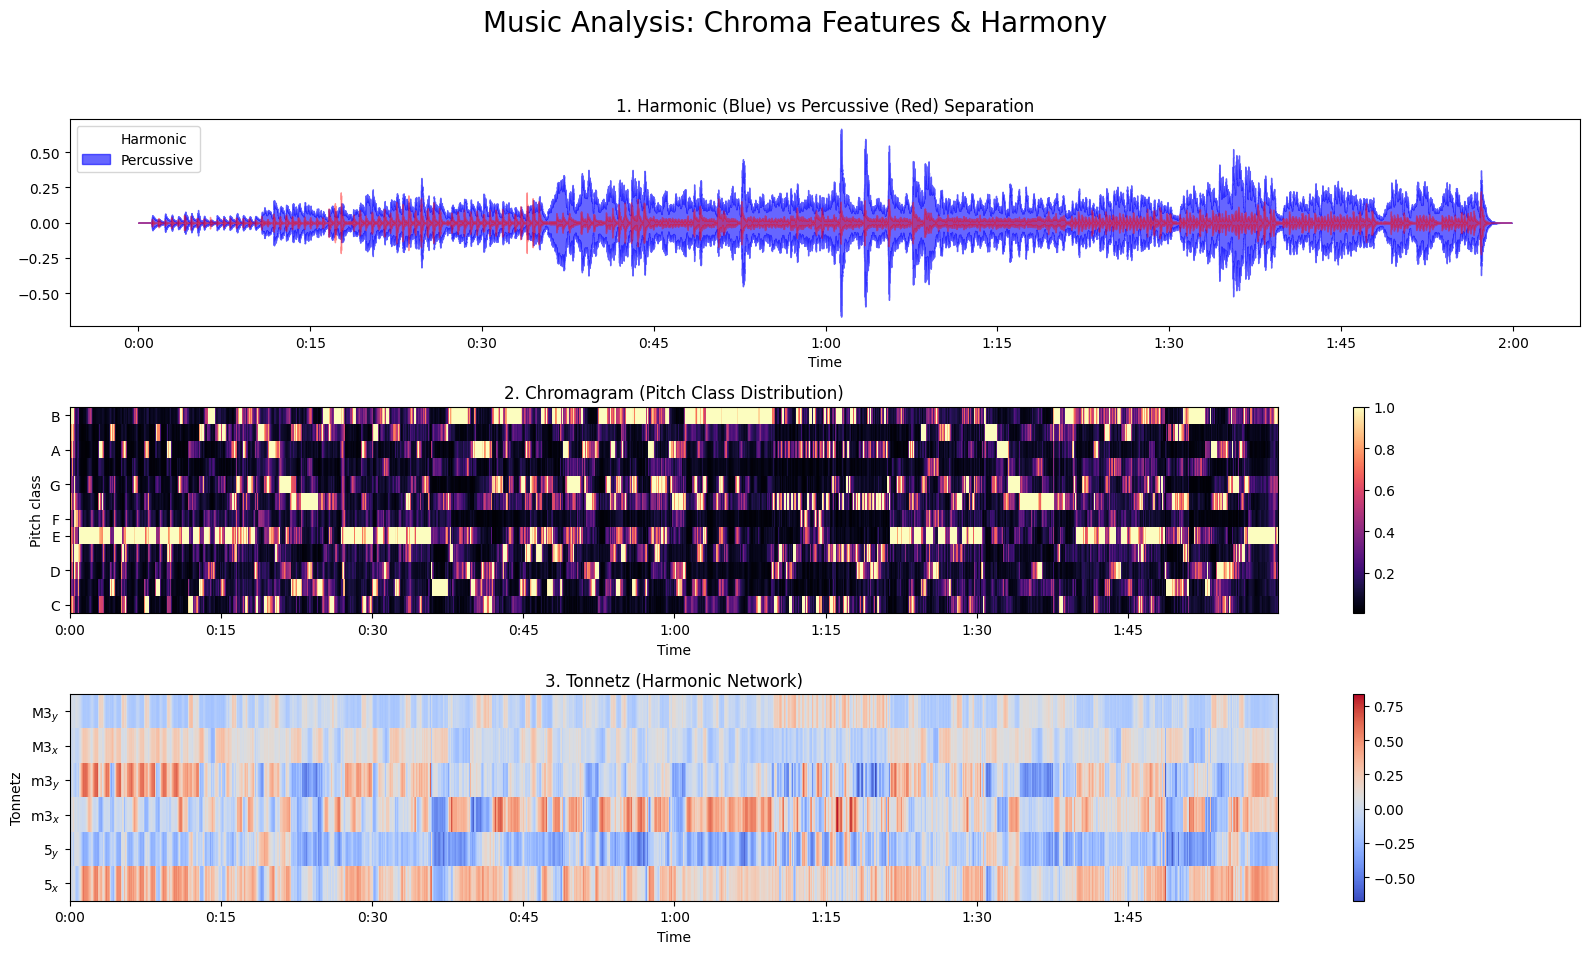

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# 1. 음악 데이터 로드 (차이코프스키 - 호두까기 인형)
filename = librosa.ex('nutcracker')
y, sr = librosa.load(filename)

# 2. 고조파(Harmonic)와 타악기(Percussive) 성분 분리 (HPSS)
# 이유: 드럼 소리(타악기)는 음정 분석에 방해가 되므로, 멜로디/화음 성분만 따로 발라냅니다.
y_harmonic, y_percussive = librosa.effects.hpss(y)

print(f"Audio Length: {len(y)/sr:.2f} s")
# ipd.Audio(y_harmonic, rate=sr) # 멜로디만 들어보기

plt.figure(figsize=(16, 10))
plt.suptitle('Music Analysis: Chroma Features & Harmony', fontsize=20)

# --- Step 1: Harmonic Waveform ---
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.6, color='b')
librosa.display.waveshow(y_percussive, sr=sr, alpha=0.4, color='r')
plt.title('1. Harmonic (Blue) vs Percussive (Red) Separation')
plt.legend(['Harmonic', 'Percussive'])

# --- Step 2: Chromagram (Chroma CQT) ---
# 12음계(C, C#, D...)로 에너지를 압축하여 보여줍니다.
# CQT(Constant-Q Transform)는 저주파 음악 분석에 더 정밀합니다.
chroma = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

plt.subplot(3, 1, 2)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('2. Chromagram (Pitch Class Distribution)')

# --- Step 3: Tonnetz (Tonal Centroids) ---
# 화성학적 관계(5도권 등)를 기반으로 화음의 변화를 시각화합니다.
tonnetz = librosa.feature.tonnetz(y=y_harmonic, sr=sr)

plt.subplot(3, 1, 3)
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('3. Tonnetz (Harmonic Network)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()